# Support vector machine (hard margin)

Introduction here (Introduce functional and geometric margin)

## Review of nonlinear optimization

https://www.cs.princeton.edu/courses/archive/spring16/cos495/slides/ML_basics_lecture5_SVM_II.pdf

## Solving the SVM problem

The goal is the solve the optimization problem 

$$\min_{w,b} \frac{1}{2}||w||_2^2 \hspace{5mm} \text{subject to} \; y_i(w^Tx_i+b)\geq 1$$

Defining the Lagrangian gives us

$$ \mathcal{L}(w, b, \lambda) =  \frac{1}{2}||w||_2^2 + \sum_{i=1}^n \lambda_i (1-y_i(w^Tx_i+b))$$

The primal problem is given by 

$$p^*=\min_{w, b} \max_{\lambda\geq 0} \mathcal{L}(w, b, \lambda)$$

Since the data is separable, Slater's condition holds and therefore, the optimization problem has zero duality gap. This suggests that we can instead solve the dual problem

$$d^*=\max_{\lambda\geq 0}\min_{w, b} \mathcal{L}(w, b, \lambda)$$

From the KKT conditions, we know that the optimal solutions $(w, b)$ satisfies

1. Stationarity Condition:

$$\begin{equation*}\begin{cases}
\nabla_{w}\mathcal{L} = w - \sum_{i=1}^n \alpha_i y_ix_i=0\\
\nabla_{b}\mathcal{L}=-\sum_{i=1}^n \alpha_i y_i=0
\end{cases}\end{equation*}$$

2. Primal feasibility condition:

$$y_i(w^Tx_i+b)\geq 1\;i=1,2,...,n$$

3. Dual feasibility condition:

$$\alpha_i\geq 0\;i=1,2,...,n$$

4. Complementarity slackness condition:

$$\alpha_i[y_i(w^Tx_i-1)]=0\;i=1,2,...,n$$

We can solve the inner maximization of the dual problem by plugging the stationary condition into the Lagrangian function, we have

$$
\begin{align*}
    \mathcal{L}(w, b, \alpha) &= \frac{1}{2} \bigg(\sum_{i=1}^n \alpha_i y_ix_i\bigg)^T\bigg(\sum_{i=1}^n \alpha_i y_ix_i\bigg) - \sum_{i=1}^n \alpha_i\bigg[y_i\bigg(\bigg(\sum_{i=1}^n \alpha_i y_ix_i\bigg)^Tx_i\bigg)-1\bigg]\\
    &= \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha_i\alpha_jy_iy_jx_i^Tx_j - \sum_{i=1}^n\sum_{j=1}^n \alpha_i\alpha_jy_iy_jx_i^Tx_j -b\sum_{i=1}^n \alpha_iy_i+\sum_{i=1}^n \alpha_i\\
    &= -b\sum_{i=1}^n \alpha_iy_i+\sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha_i\alpha_jy_iy_jx_i^Tx_j
\end{align*}\\
$$

Therefore, it remains solving the dual problem 

$$\max_{\alpha\geq 0}\sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha_i\alpha_jy_iy_jx_i^Tx_j$$

This can be solved using quadratic programming softwares. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cvxopt.solvers

In [38]:
class supportVectorMachine:
    
    def __init__(self, D):
        self.w = np.random.randn(D)
        self.b = np.random.randn()
        self.alpha = None
    
    def fit(self, X, y):
        N = len(X)
        K = np.array([np.dot(X[i], X[j])
              for i in range(N)
              for j in range(N)]).reshape((N, N)) 
        P = cvxopt.matrix(np.outer(y, y) * K) 
        q = cvxopt.matrix(-1 * np.ones(N)) 
        A = cvxopt.matrix(y, (1, N)) 
        b = cvxopt.matrix(0.0) 
        G = cvxopt.matrix(np.diag(-1 * np.ones(N))) 
        h = cvxopt.matrix(np.zeros(N)) 
        solution = cvxopt.solvers.qp(P, q, G, h, A, b) 
        alpha = np.ravel(solution['x']) 
        self.w = np.array([alpha[i] * y[i] * X[i] for i in range(len(X))]).sum(axis=0)
        self.b = np.sum([y[i] - np.dot(w, X[i]) for i in range(len(X))]) / len(X)
        self.alpha = alpha
    
    def predict(self, X):
        prod = np.dot(X, self.b) + w
        y = np.where(prod > 0, 1, -1)
        return y

In [39]:
x1 = np.random.multivariate_normal([0.8, 0.8], np.diag([0.15, 0.15]), 30)
x2 = np.random.multivariate_normal([-0.8, -0.8], np.diag([0.15, 0.15]), 30)
y1 = np.ones(30) 
y2 = -np.ones(30)
X = np.vstack((x1, x2))
y = np.concatenate((y1, y2))
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [40]:
svm = supportVectorMachine(2)
alpha = svm.fit(X, y)

     pcost       dcost       gap    pres   dres
 0: -6.4619e+00 -1.2066e+01  1e+02  1e+01  2e+00
 1: -8.1836e+00 -5.1237e+00  2e+01  1e+00  2e-01
 2: -2.7592e+00 -3.3418e+00  9e-01  2e-02  3e-03
 3: -3.0991e+00 -3.2052e+00  1e-01  3e-03  4e-04
 4: -3.1862e+00 -3.1883e+00  3e-03  3e-05  5e-06
 5: -3.1879e+00 -3.1879e+00  3e-05  3e-07  5e-08
 6: -3.1879e+00 -3.1879e+00  3e-07  3e-09  5e-10
Optimal solution found.


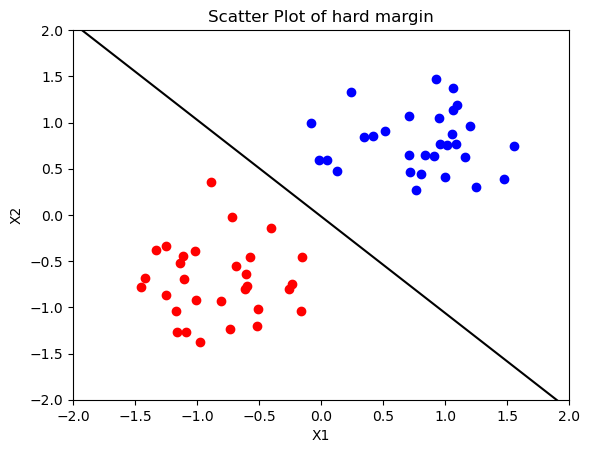

In [41]:
plt.scatter(x1[:, 0], x1[:, 1], color='blue')
plt.scatter(x2[:, 0], x2[:, 1], color='red')
x_line = np.linspace(-2, 2, 100)
plt.plot(x_line, svm.b -svm.w[0] * x_line / svm.w[1], color='black', label='y=x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of hard margin')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()